In [ ]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [ ]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9121265377855887

* 정밀도

In [ ]:
from sklearn.metrics import precision_score
precision_score(y,y_pred)

0.900990099009901

* 재현율

In [ ]:
from sklearn.metrics import recall_score
recall_score(y,y_pred)

0.8584905660377359

* F1 score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y,y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [ ]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred_proba0 = pred_proba[:,1] # 0이 양성임 (문제셋팅에서)
binarizer = Binarizer(threshold = 0.1)
y_pred2 = binarizer.fit_transform(pred_proba0.reshape(-1,1)) # binarizer는 2d-array 값을 받음.

In [ ]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print('혼동행렬')
print(confusion_matrix(y,y_pred2))
print('정확도:',accuracy_score(y,y_pred2))
print('정밀도:', precision_score(y,y_pred2))
print('재현율:',recall_score(y,y_pred2))
print('f1 score:', f1_score(y,y_pred2))

혼동행렬
[[267  90]
 [  6 206]]
정확도: 0.8312829525483304
정밀도: 0.6959459459459459
재현율: 0.9716981132075472
f1 score: 0.8110236220472441


* ROC 곡선 시각화

In [ ]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y, pred_proba[:,1]) # roc는 예측결과가 아닌 예측확률을 인자로 받음

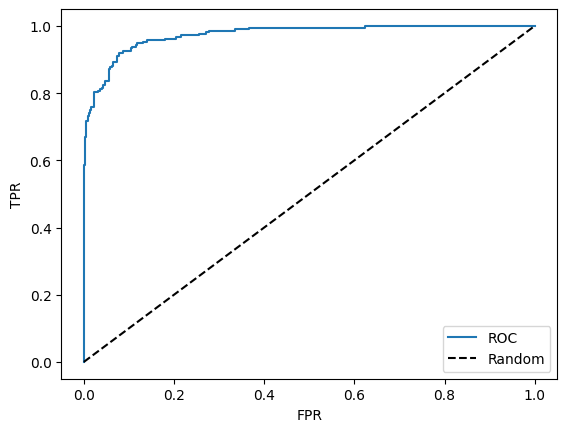

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

* ROC AUC 값

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, pred_proba[:,1])

0.97412927435125